<a href="https://colab.research.google.com/github/timeseriesAI/timeseriesAI/blob/master/tutorial_nbs/03_Time_Series_Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

created by Ignacio Oguiza - email: oguiza@gmail.com

# Time Series Transforms

In [1]:
import sys
ISCOLAB = 'google.colab' in sys.modules
if ISCOLAB:
    # uncomment for bleeding edge
    !pip install git+https://github.com/fastai/fastcore.git@master -q
    !pip install git+https://github.com/fastai/fastai2.git@master -q
    !pip install git+https://github.com/timeseriesAI/timeseriesAI.git -q
    
    # uncomment for latest stable version
    # !pip install tsai -q
    
from tsai.all import *
package_versions()
hardware_details()

tsai       : 0.0.12
fastai2    : 0.0.17
fastcore   : 0.1.17
torch      : 1.4.0
scipy      : 1.3.1
numpy      : 1.18.1
pandas     : 0.25.1
Total RAM  :   8.00 GB
Used RAM   :   4.32 GB
n_cpus     : 8
device     : cpu


In [2]:
dsid = 'NATOPS'
X, y, splits = get_UCR_data(dsid, parent_dir='./data/UCR/', verbose=True, on_disk=True, return_split=False)

Dataset: NATOPS
X      : (360, 24, 51)
y      : (360,)
splits : ((#180) [0,1,2,3,4,5,6,7,8,9...], (#180) [180,181,182,183,184,185,186,187,188,189...]) 



In [3]:
tfms = [None, Categorize()]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=128, num_workers=0, after_batch=[TSStandardize(by_sample=False, by_var=False)])
xb, yb = next(iter(dls.train))
test_close(xb.mean(), 0, eps=1e-1)
test_close(xb.std(), 1, eps=1e-1)

In [4]:
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=128, num_workers=0, after_batch=[TSNormalize(by_var=False)])
xb, yb = next(iter(dls.train))
test_close(xb.min(), -1, eps=1e-1)
test_close(xb.max(), 1, eps=1e-1)
xb, yb = next(iter(dls.valid))
test_close(xb.min(), -1, eps=1e-1)
test_close(xb.max(), 1, eps=1e-1)

In [5]:
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=128, num_workers=0)
xb, yb = next(iter(dls.train))

In [6]:
%timeit TSIdentity()(xb)

165 µs ± 7.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


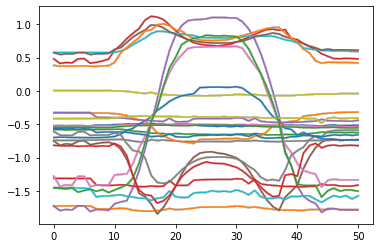

In [7]:
for i in range(100): plt.plot(TSIdentity()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [10]:
%timeit TSMagNoise()(xb)

726 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


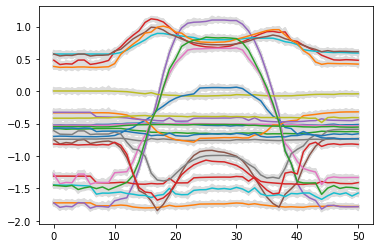

In [11]:
#.02-.2
for i in range(100): plt.plot(TSMagNoise(.02)(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [12]:
%timeit TSMagMulNoise()(xb)

661 µs ± 9.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


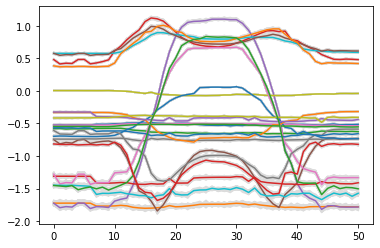

In [13]:
#.01-.1
for i in range(100): plt.plot(TSMagMulNoise(.01)(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [14]:
%timeit TSTimeNoise()(xb)

32.9 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


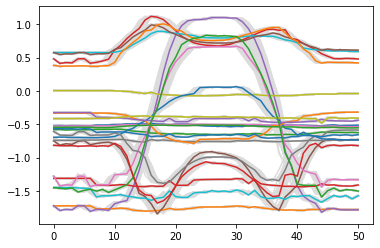

In [15]:
#.1-.5
for i in range(100): plt.plot(TSTimeNoise()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [16]:
%timeit TSMagWarp()(xb)

2.22 ms ± 76.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


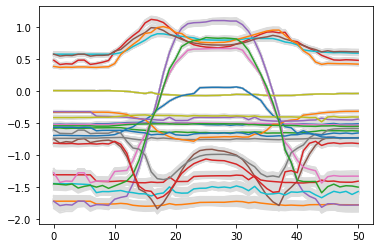

In [17]:
#.02-.2
for i in range(100): plt.plot(TSMagWarp()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [18]:
%timeit TSTimeWarp()(xb)

31.2 ms ± 701 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


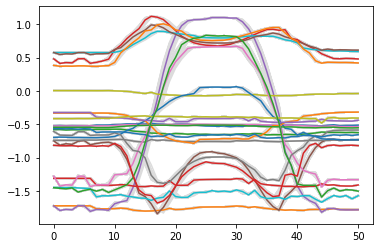

In [19]:
#.02-.2
for i in range(100): plt.plot(TSTimeWarp()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [20]:
%timeit TSMagScale()(xb)

751 µs ± 50.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


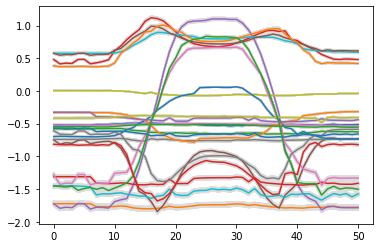

In [21]:
#.02-.2
for i in range(100): plt.plot(TSMagScale()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [22]:
%timeit TSMagScaleVar()(xb)

786 µs ± 7.76 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


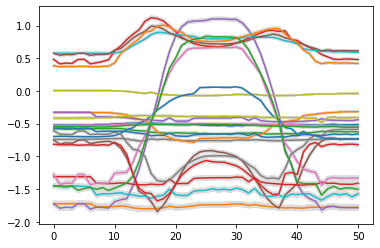

In [23]:
#.02-.2
for i in range(100): plt.plot(TSMagScaleVar()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [24]:
%timeit TSZoomIn()(xb)

The slowest run took 7.82 times longer than the fastest. This could mean that an intermediate result is being cached.
256 ms ± 210 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


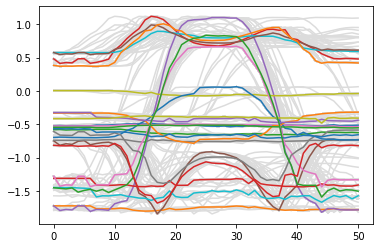

In [25]:
#.02-.2
for i in range(100): plt.plot(TSZoomIn()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [26]:
%timeit TSZoomOut()(xb)

41.1 ms ± 4.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


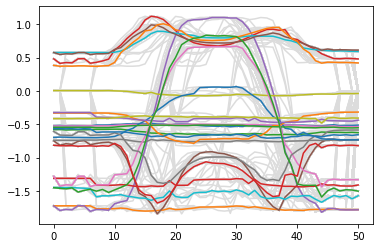

In [27]:
#.02-.2
for i in range(100): plt.plot(TSZoomOut()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [28]:
%timeit TSScale()(xb)

38.6 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


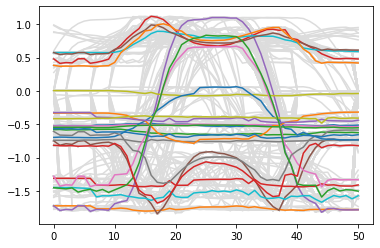

In [29]:
#.02-.2
for i in range(100): plt.plot(TSScale(.02)(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [30]:
%timeit TSRandomTimeStep()(xb)

40.1 ms ± 3.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


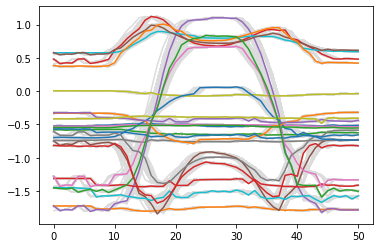

In [31]:
#.02-.2
for i in range(100): plt.plot(TSRandomTimeStep()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [32]:
%timeit TSBlur()(xb)

3.71 ms ± 57.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


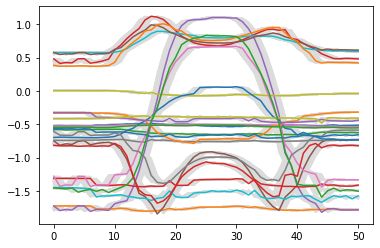

In [33]:
#.05-.5
for i in range(100): plt.plot(TSBlur(.05)(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [34]:
%timeit TSSmooth()(xb)

4.3 ms ± 852 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


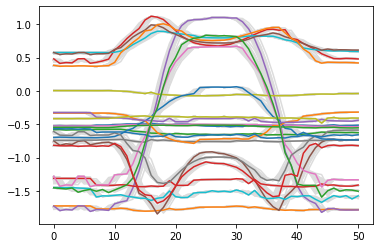

In [35]:
#.05-.5
for i in range(100): plt.plot(TSSmooth()(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [36]:
%timeit TSDenoise()(xb)

15.1 ms ± 304 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


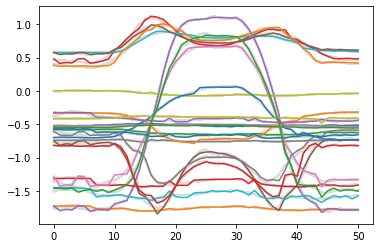

In [37]:
#.1-1
for i in range(100): plt.plot(TSDenoise(.1)(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [38]:
%timeit TSRandomNoise()(xb)

13.3 ms ± 548 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


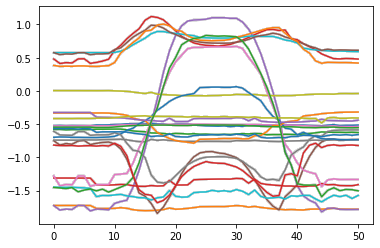

In [39]:
#.1-1
for i in range(100): plt.plot(TSRandomNoise(.1)(xb[0]).T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [40]:
%timeit TSLookBack()(xb)

762 µs ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


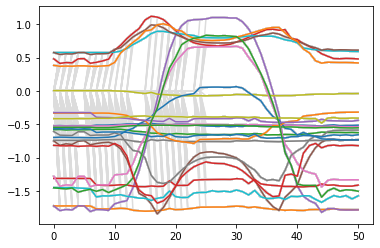

In [41]:
#.01-.1
for i in range(100): plt.plot(TSLookBack()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [42]:
%timeit TSVarOut()(xb)

814 µs ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


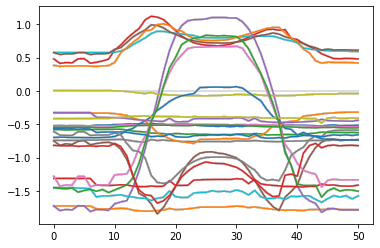

In [43]:
#.05-.5
for i in range(100): plt.plot(TSVarOut()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [44]:
%timeit TSCutOut()(xb)

820 µs ± 9.27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


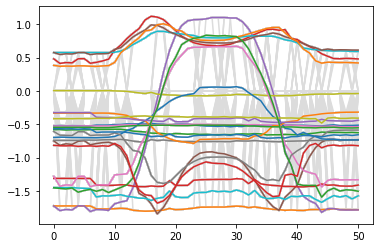

In [45]:
#.05- .5
for i in range(100): plt.plot(TSCutOut()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [46]:
%timeit TSTimeStepOut()(xb)

1.35 ms ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


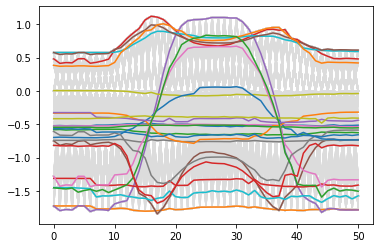

In [47]:
#.1- .5
for i in range(100): plt.plot(TSTimeStepOut()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [48]:
%timeit TSCrop()(xb)

946 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


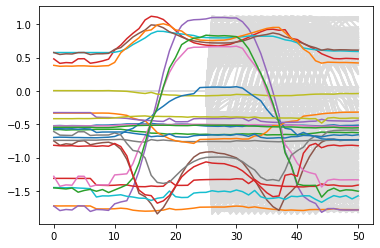

In [49]:
#.50- .5
for i in range(100): plt.plot(TSCrop()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [50]:
%timeit TSRandomCrop()(xb)

856 µs ± 20.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


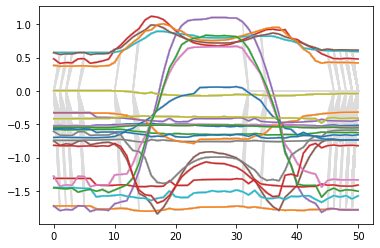

In [51]:
#.05- .5
for i in range(100): plt.plot(TSRandomCrop()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [52]:
%timeit TSRandomResizedCrop()(xb)

11.5 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


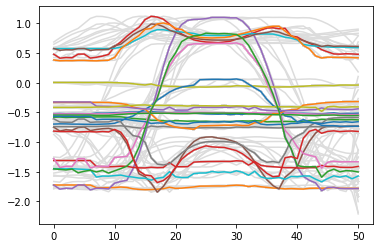

In [53]:
#.01- .1
for i in range(100): plt.plot(TSRandomResizedCrop()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [54]:
%timeit TSCenterCrop()(xb)

900 µs ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


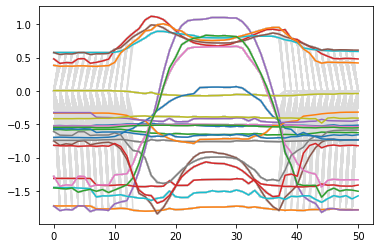

In [55]:
#.05- .5
for i in range(100): plt.plot(TSCenterCrop()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [56]:
%timeit TSMaskOut()(xb)

5.86 ms ± 71.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


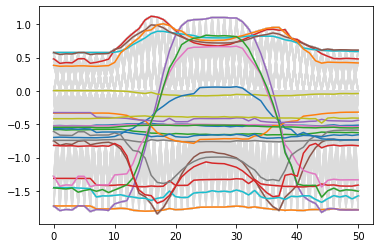

In [57]:
#.05- .5
for i in range(100): plt.plot(TSMaskOut()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [58]:
%timeit TSTranslateX()(xb)

216 µs ± 3.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


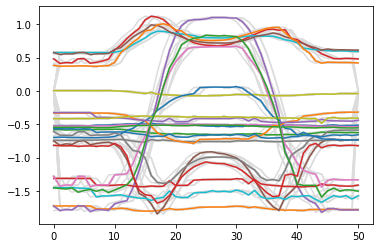

In [59]:
#.1- .5
for i in range(100): plt.plot(TSTranslateX()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [60]:
%timeit TSFlip()(xb)

16.4 ms ± 49.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


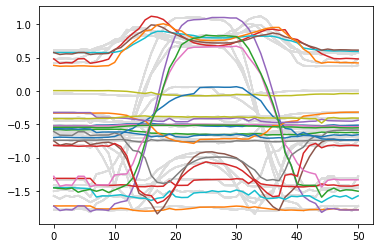

In [85]:
for i in range(10): plt.plot(TSFlip()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [62]:
%timeit TSRandomFlip()(xb)

8.52 ms ± 683 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


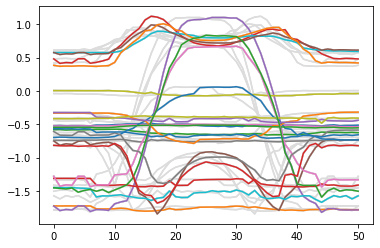

In [86]:
for i in range(10): plt.plot(TSRandomFlip()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [64]:
%timeit TSShift()(xb)

1.1 ms ± 65.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


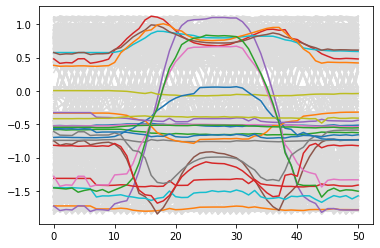

In [65]:
for i in range(100): plt.plot(TSShift(.01)(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [66]:
%timeit TSRandomRotate()(xb)

3.05 ms ± 89 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


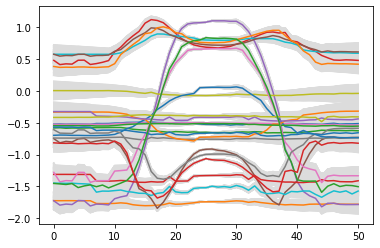

In [67]:
#.1-.5
for i in range(100): plt.plot(TSRandomRotate()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [68]:
%timeit TSNeg()(xb)

552 µs ± 5.52 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


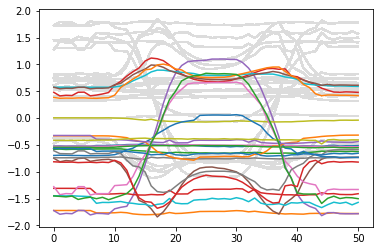

In [69]:
for i in range(100): plt.plot(TSNeg()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [70]:
%timeit TSRandomNeg()(xb)

382 µs ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


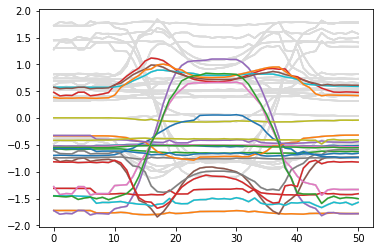

In [87]:
for i in range(10): plt.plot(TSRandomNeg()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [72]:
%timeit TSFreqNoise()(xb)

12.8 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


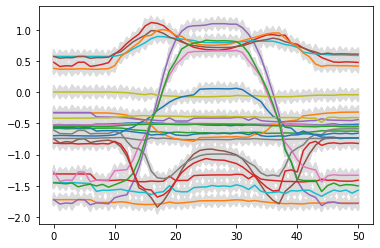

In [73]:
#.1-.5
for i in range(100): plt.plot(TSFreqNoise()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [74]:
%timeit TSFreqWarp()(xb)

45.9 ms ± 581 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


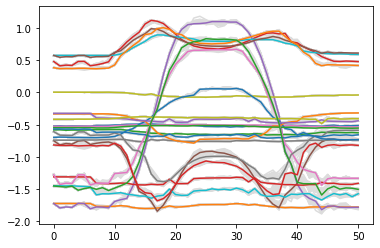

In [75]:
#.1-.5
for i in range(100): plt.plot(TSFreqWarp()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [76]:
%timeit TSFreqScale()(xb)

12.6 ms ± 97.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


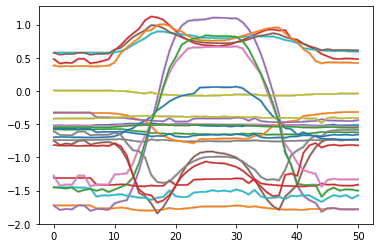

In [77]:
#.5-5.
for i in range(100): plt.plot(TSFreqScale()(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

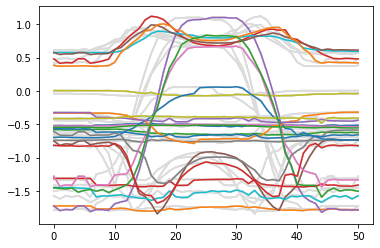

In [88]:
for i in range(10): plt.plot(Pipeline(TSRandomFlip(), TSRandomNeg())(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()

In [79]:
class RandAugment():
    def __init__(self, tfms:list, N:int=1, M=0, **kwargs):
        '''
        tfms: list of available tfms
        N: number of tfms applied each time (usual values 1-3)
        M: magnitude of the tfm (1-10, usually 3-5)
        kwargs: tfm kwargs
        '''

        if isinstance(L(tfms)[0], list): tfms = tfms[0]        
        if isinstance(tfms, tuple):
            tfms = [tfms]
            self.tup = True
        else:
            tfms = L(tfms)
            self.tup = False
            if isinstance(tfms[0], tuple): self.tup = True
        self.n_tfms = len(tfms)
        self.tfms,self.kwargs = tfms,kwargs
        assert self.tfms is not None and len(L(self.tfms)) > 0, print('No tfms passed to RandAugment')
        self.N = min(len(L(self.tfms)), N)
        if isinstance(M, tuple): 
            self.M = tuple([float(min(10, m)) / 10 for m in M])
            self.M_tuple = True
        else:
            self.M = float(min(10, M)) / 10 if M is not None else M
            self.M_tuple = False
#         print('tfms:', self.tfms, 'n_tfms:', self.n_tfms, 'tuple:', self.tup)

    def __call__(self, x):
        
        tfms = []
        if self.N == 0 or self.M == 0: return x
        elif self.n_tfms == 1: self.sel_tfms = self.tfms
        else: self.sel_tfms = np.array(self.tfms)[np.random.choice(np.arange(self.n_tfms), self.N, replace=False)]
        if self.tup: 
            for tfm, minval, maxval in self.sel_tfms:
                if self.M is None: tfms += [tfm(**self.kwargs)]
                else:
                    if self.M_tuple: M = (np.max(self.M) - np.min(self.M)) * np.random.rand()
                    else: M = self.M
                    mag = M * float(maxval - minval) + minval
                    tfms += [tfm(magnitude=mag, **self.kwargs)]
        else:
            for tfm in self.sel_tfms:
                if self.M is None: tfms += tfm(**self.kwargs)
                else: 
                    if self.M_tuple: M = (np.max(self.M) - np.min(self.M)) * np.random.rand()
                    else: M = self.M
                    tfms += [tfm(M , **self.kwargs)]
        return Pipeline(tfms)(x)
    
    
@patch
def randaugment(self:Learner, tfms:list, N:int=2, M:int=None, **kwargs)->Learner:
    self.data.train_dl.tfms = RandAugment(tfms, N=N, M=M, **kwargs)
    return learn

In [80]:
BB_tfms = [TSIdentity, TSMagScale, partial(TSRandomTimeStep), partial(TSTimeWarp, ex=0), TSMagScaleVar,
           TSRandomRotate,partial(TSMagWarp, ex=0), partial(TSTimeNoise, ex=0)]

In [81]:
for i in range(100): 
    xb2 = RandAugment(BB_tfms, N=3, M=1)(xb)
    test_eq(xb2.shape, xb.shape)
    assert not np.array_equal(xb2.data, xb.data)

In [82]:
BB_tfms = [
    (TSIdentity, 0., 1.),
    (TSMagScale, .02, .2),
    (partial(TSRandomTimeStep), .02, .2),
    (partial(TSTimeWarp, ex=0), .02, .2),
    (TSMagScaleVar, .02, .2),
    (TSRandomRotate, .1, .5),
    (partial(TSMagWarp, ex=0), .02, .2),
    (partial(TSTimeNoise, ex=0), .05, .5),
]

In [83]:
for i in range(100): 
    xb2 = RandAugment(BB_tfms, N=3, M=1)(xb)
    test_eq(xb2.shape, xb.shape)
    assert not np.array_equal(xb2.data, xb.data)

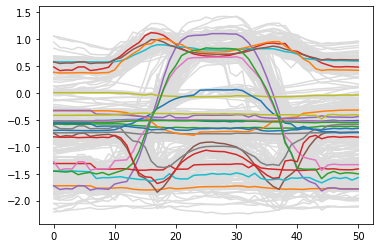

In [84]:
for i in range(20): plt.plot(RandAugment(BB_tfms, N=3, M=5)(xb)[0].T, color='gainsboro')
plt.plot(xb[0].T)
plt.show()